In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,concatenate, Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten,Conv2D, Convolution2D, Reshape
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D,Conv2DTranspose
#from tensorflow.keras.models import Model

In [2]:
import matplotlib.pyplot as plt
import cv2 
import glob 
import os 
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from pandas import read_excel
#pip3 install xlrd

In [5]:
data_in_images_path1 = '/tensorflow/IITD_Database/'
data_in_labels_path1  = '/tensorflow/accurate_iitd.xlsx'

data_in_images_path2 = '/tensorflow/casia_images/'
data_in_labels_path2  = '/tensorflow/accurate_casia1.xlsx'
#test_in_images_path = '/home/pvc/deep_learning_own_model/data/segnet_iris_data/val_frames/val/'
#test_in_labels_path = '/home/pvc/deep_learning_own_model/data/segnet_iris_data/hough_out/test.csv'

In [6]:
#data = pd.read_csv(data_in_labels_path)
data1 = read_excel(data_in_labels_path1, sheetname='Sheet1')
data2 = read_excel(data_in_labels_path2, sheetname='Sheet1')

/usr/local/lib/python3.5/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [7]:
data2.head()

image_name  R1p  Y1p  X1p  R1s  Y1s  X1s
0  001_001_1_1.bmp   37  182  136  100  178  136
1  001_001_1_2.bmp   40  174  138  100  170  140
2  001_001_1_3.bmp   39  174  121  102  169  123
3  001_001_2_1.bmp   41  183  123  101  180  121
4  001_001_2_2.bmp   39  178  147  105  174  150

In [8]:
data1.head()

image_name  R1p  Y1p  X1p  R1s  Y1s  X1s
0  001_01.bmp   45  131  143   98  132  148
1  001_02.bmp   46  147  133   98  147  138
2  001_03.bmp   47  146  133   98  146  137
3  001_04.bmp   47  153  126   98  153  130
4  001_05.bmp   47  150  122   98  149  126

In [9]:
data1['X1p'][0]


143

In [10]:
def load_img_data_tensor_1(img_path,csv_path,h,w,c):
    #N = len(os.listdir(path)) 
    
    
    #data = pd.read_csv(csv_path)
    data = read_excel(csv_path, sheetname='Sheet1')
    N = len(data)
    N = 800
    data_out_img= np.zeros((N,h,w,c),'float')
    
    data_out_label = np.zeros((N,6),'float')
    #img_template = cv2.resize(img_template,(h,w))
    
    rgbt_img = np.zeros((h,w,c),'float') 
    img_1 = np.zeros((h,w,c),'float') 
    for i in range(0,N):
    
        name = data['image_name'][i]
        folder_name = name.split("_")[0]
        image_name = name.split("_")[1]

        img = cv2.imread(img_path + folder_name + '/'+ image_name)
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_1[0:240,0:320,:] = img_rgb
        data_out_img[i] = img_1
        data_out_label[i,0] = data['Y1s'][i]
        data_out_label[i,1] = data['X1s'][i]
        data_out_label[i,2] = data['R1s'][i]
        data_out_label[i,3] = data['Y1p'][i]
        data_out_label[i,4] = data['X1p'][i]
        data_out_label[i,5] = data['R1p'][i]
    return data_out_img,data_out_label

In [11]:
def load_img_data_tensor_2(img_path,csv_path,h,w,c):
    #N = len(os.listdir(path)) 
    
    
    #data = pd.read_csv(csv_path)
    data = read_excel(csv_path, sheetname='Sheet1')
    N = len(data)
    N = 200
    data_out_img= np.zeros((N,h,w,c),'float')
    
    data_out_label = np.zeros((N,6),'float')
    #img_template = cv2.resize(img_template,(h,w))
    
    rgbt_img = np.zeros((h,w,c),'float') 
    img_1 = np.zeros((h,w,c),'float') 
    for i in range(0,N):
    
        name = data['image_name'][i]
        folder_name = name.split("_")[0]
        image_name = name.split("_")[1]
        #print(img_path + name)
        img = cv2.imread(img_path + name)
        #img_s = cv2.resize(img,(280,242))
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_1[0:280,0:320,:] = img_rgb
        #img_1[0:242,0:280,:] = img_rgb
        data_out_img[i] = img_1
        data_out_label[i,0] = data['Y1s'][i]
        data_out_label[i,1] = data['X1s'][i]
        data_out_label[i,2] = data['R1s'][i]
        data_out_label[i,3] = data['Y1p'][i]
        data_out_label[i,4] = data['X1p'][i]
        data_out_label[i,5] = data['R1p'][i]
    return data_out_img,data_out_label

In [12]:
img_height = 512
img_width = 512

In [13]:
data_image_orig1,data_label_orig1 = load_img_data_tensor_1(data_in_images_path1,data_in_labels_path1,img_height,img_width,3)
data_image_orig2,data_label_orig2 = load_img_data_tensor_2(data_in_images_path2,data_in_labels_path2,img_height,img_width,3)

In [14]:
data_image_orig = np.zeros((1000,img_height,img_width,3),'float')
data_label_orig = np.zeros((1000,6),'float')

data_image_orig[0:800,:,:,:] = data_image_orig1[0:800,:,:,:]
data_image_orig[800:,:,:,:] = data_image_orig2[0:200,:,:,:]

data_label_orig[0:800,:] = data_label_orig1[0:800,:]
data_label_orig[800:,:]= data_label_orig2[0:200,:]


In [15]:
data_image_orig.shape

(1000, 512, 512, 3)

In [16]:
2240+756


320/1.157

276.5773552290406

In [17]:
data_image_orig, data_label_orig = shuffle(data_image_orig, data_label_orig)

In [18]:
#N = len(data)
train_image_orig = data_image_orig[0:800,:,:,:]
train_label_orig = data_label_orig[0:800,:]
val_image_orig  = data_image_orig[800:,:,:,:]
val_lable_orig = data_label_orig[800:,:]

In [19]:
#val_image_orig,val_lable_orig = load_img_data_tensor(test_in_images_path,test_in_labels_path,img_height,img_width,3)

In [20]:
#val_mask_orig = load_img_data_tensor(test_in_labels_path,img_height,img_width,1)

In [21]:
X_train = train_image_orig/255.

In [22]:
Y_train = train_label_orig

In [23]:
X_test = val_image_orig/255.

Y_test = val_lable_orig
#Y_test = np.expand_dims(Y_test, axis=3)

In [24]:
#X_train, Y_train = shuffle(X_train, Y_train)

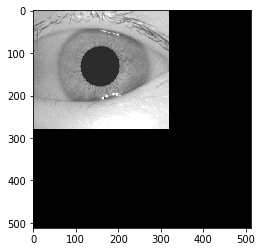

In [32]:
plt.imshow(X_train[6,:,:,0],cmap='gray')
plt.show()

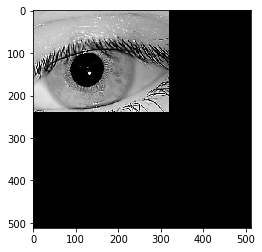

In [33]:
plt.imshow(X_test[10,:,:,0],cmap='gray')
plt.show()

In [ ]:
#plt.imshow(Y_train[10,:,:,0],cmap='gray')
#plt.show()

In [ ]:
#plt.imshow(Y_test[10,:,:,0],cmap='gray')
#plt.show()

In [34]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 800
number of test examples = 200
X_train shape: (800, 512, 512, 3)
Y_train shape: (800, 6)
X_test shape: (200, 512, 512, 3)
Y_test shape: (200, 6)


In [ ]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [ ]:
def Short_model(input_shape,n_filters=16,dropout=.1,batchnorm=True):
    
    X_input = Input(input_shape)
    
    c1 = conv2d_block(X_input,n_filters*1,kernel_size=3,batchnorm=batchnorm)     
    p1 = MaxPooling2D((2,2))(c1)           # (h/2,w/2,16)
    p1 = Dropout(dropout)(p1) 
    
    c2 = conv2d_block(p1,n_filters*2,kernel_size=3,batchnorm=batchnorm)
    p2 = MaxPooling2D((2,2))(c2)  # (h/4,w/4,32)
    p2 = Dropout(dropout)(p2) 
    
    c3 = conv2d_block(p2,n_filters*4,kernel_size=3,batchnorm=batchnorm)
    p3 = MaxPooling2D((2,2))(c3)  # (h/8,w/8,64)
    p3 = Dropout(dropout)(p3) 
    
    c4 = conv2d_block(p3,n_filters*8,kernel_size=3,batchnorm=batchnorm)
    p4 = MaxPooling2D((2,2))(c4)  # (h/16,w/16,128)
    p4 = Dropout(dropout)(p4) 
    
    c5 = conv2d_block(p4,n_filters*16,kernel_size=3,batchnorm=batchnorm)      # (h/16,w/16,256)

    
   
    c6 = Flatten()(c5)
    X_outputs = Dense(6, activation ='linear')(c6)
        
    print("encoder done")   
    #u6 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (16, 16), padding = 'same',name="deconv1")(c2)  # (h,w,16)
    #u6 = concatenate([u6, c1])   # (h/8,w/8,128)
    #u6 = Dropout(dropout)(u6)
    #c6 = conv2d_block(u6, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)     # (h,w,16)
        
    print("decoder done")
    #X_outputs = Conv2D(1,(1,1),activation='sigmoid')(c6)       # (h,w,1)
    
    model = Model(inputs=X_input,outputs=X_outputs,name='Short_model')
    
    return model   

In [ ]:
shortmodel = Short_model((512,512,3))

In [ ]:
shortmodel.summary()

In [ ]:
shortmodel.compile(loss='mean_squared_error', optimizer="Adam", metrics = ['mae', 'acc'])

In [ ]:
history = shortmodel.fit(x = X_train, y = Y_train, epochs = 100,validation_data=(X_test,Y_test), batch_size = 4)

In [ ]:
import matplotlib.pyplot as plt
# Let's take a look at how we did during training.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Accuracy
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()



In [3]:
model_save_path = '/tensorflow/hough_model/houghmodel_unet_encoder_100_caisa_IITD.h5'

#shortmodel.save(model_save_path)

In [4]:
shortmodel = load_model(model_save_path)

In [35]:
X_test[0:1].shape

(1, 512, 512, 3)

In [36]:
preds = shortmodel.predict(X_test[1:2])

In [37]:
preds.shape

(1, 6)

In [38]:
import matplotlib.pyplot as plt

In [39]:
out_image = np.squeeze(preds)


In [40]:
def draw_haugh_circle(img,hough_param):        
            
    cimg = img.copy()
    cv2.circle(cimg,(hough_param[0],hough_param[1]),hough_param[2],(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(hough_param[0],hough_param[1]),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(hough_param[3],hough_param[4]),hough_param[5],(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(hough_param[3],hough_param[4]),2,(0,0,255),3)

    plt.imshow(cimg)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


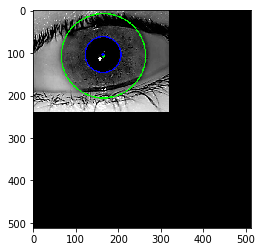

In [42]:
draw_haugh_circle(X_test[1:2][0],preds[0])

In [43]:
def haugh_circle_gt(X,Y,shortmodel):        
    preds = shortmodel.predict(X) 
    
    for i in range(len(preds)):
        #name = data1['image_name'][i]
        #print(name)
        cimg = X[i,:,:,:].copy()
        hough_param = preds[i]
        hough_param_gt = Y[i].astype('int')
        cv2.circle(cimg,(hough_param[0],hough_param[1]),hough_param[2],(0,255,0),2)
                    # draw the center of the circle
        cv2.circle(cimg,(hough_param[0],hough_param[1]),2,(0,255,0),3)

                    #for i in circles_inner[0,:]:
                    # draw the outer circle
        cv2.circle(cimg,(hough_param[3],hough_param[4]),hough_param[5],(0,0,255),2)
                    # draw the center of the circle
        cv2.circle(cimg,(hough_param[3],hough_param[4]),2,(0,0,255),3)
        
        
        cv2.circle(cimg,(hough_param_gt[0],hough_param_gt[1]),hough_param_gt[2],(255,0,255),2)
                    # draw the center of the circle
        cv2.circle(cimg,(hough_param_gt[0],hough_param_gt[1]),2,(255,0,255),3)

                    #for i in circles_inner[0,:]:
                    # draw the outer circle
        cv2.circle(cimg,(hough_param_gt[3],hough_param_gt[4]),hough_param_gt[5],(255,0,0),2)
                    # draw the center of the circle
        cv2.circle(cimg,(hough_param_gt[3],hough_param_gt[4]),2,(255,0,0),3)

        plt.imshow(cimg)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


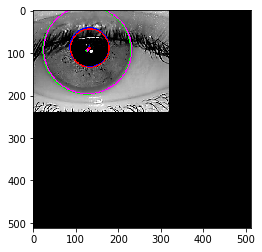

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


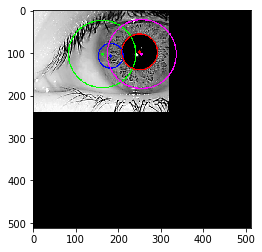

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


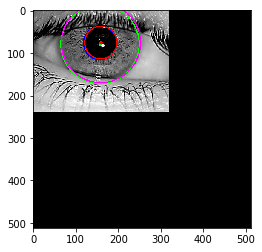

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


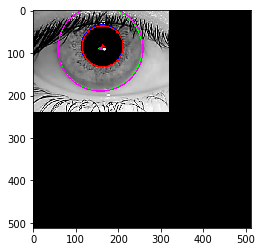

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


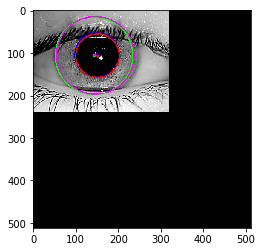

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


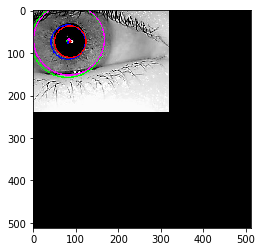

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


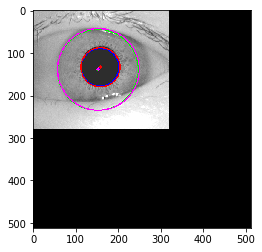

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


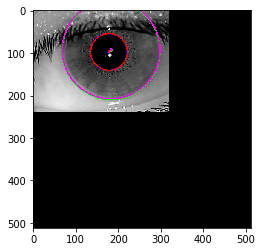

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


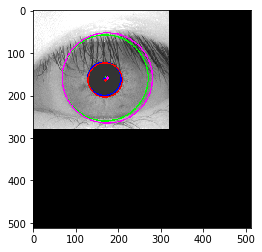

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


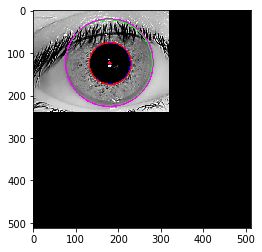

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


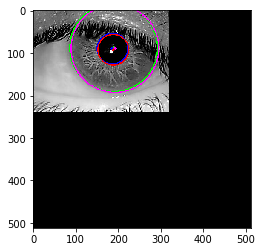

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


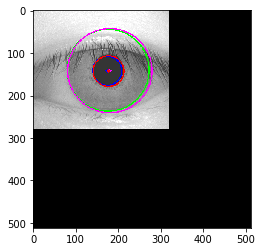

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


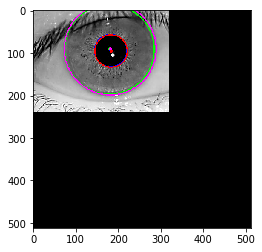

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


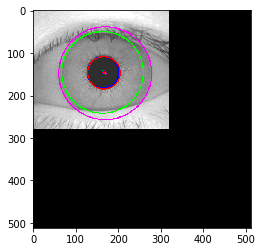

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


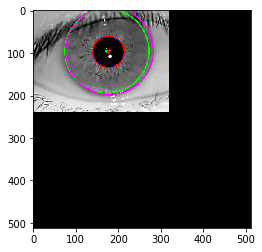

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


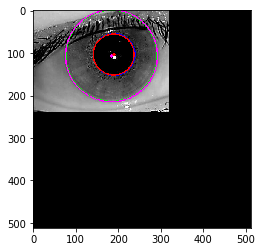

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


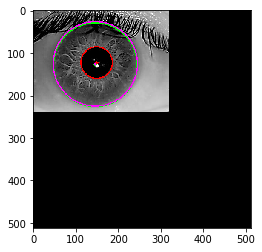

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


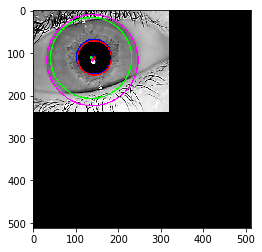

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


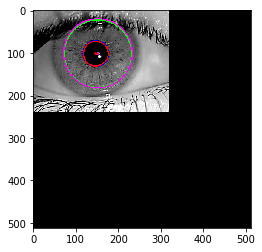

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


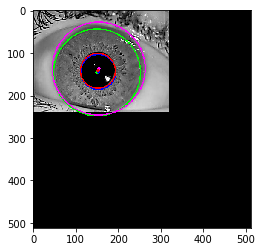

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


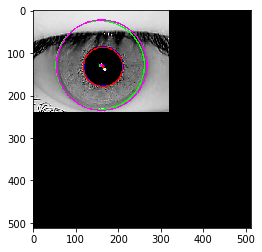

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


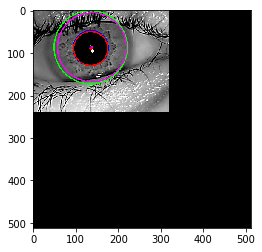

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


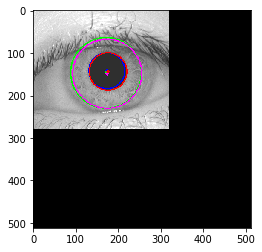

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


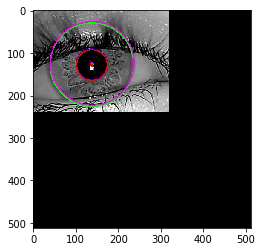

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


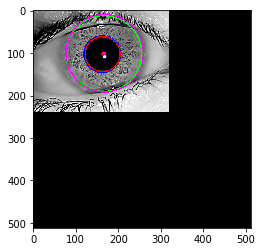

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


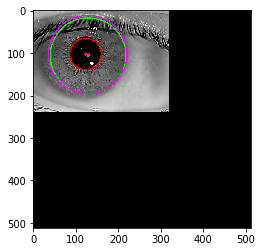

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


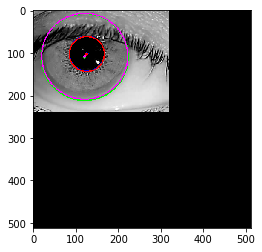

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


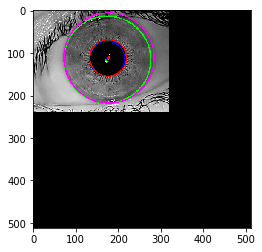

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


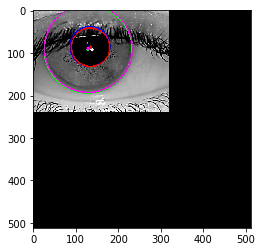

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


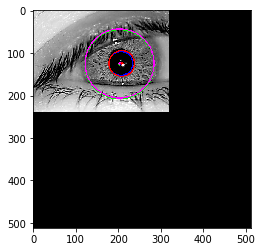

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


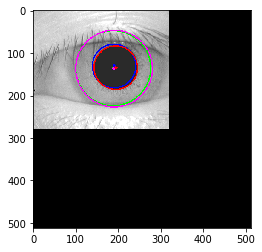

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


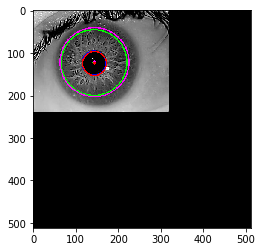

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


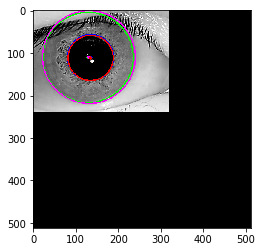

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


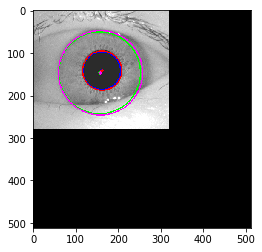

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


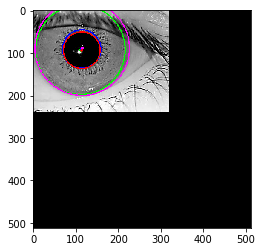

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


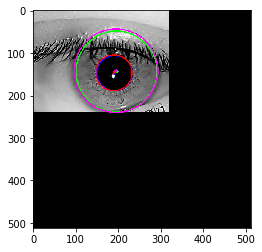

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


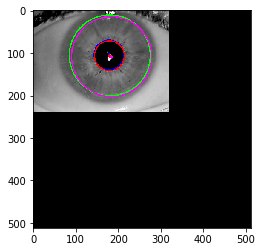

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


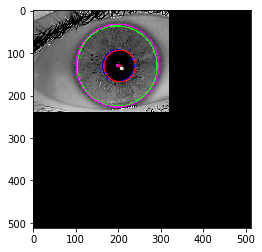

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


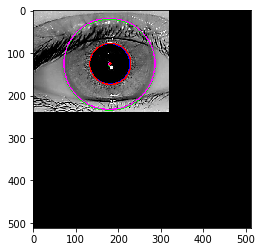

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


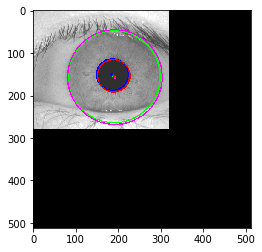

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


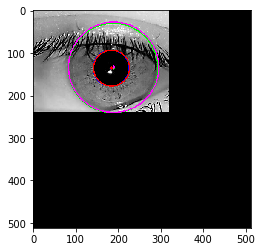

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


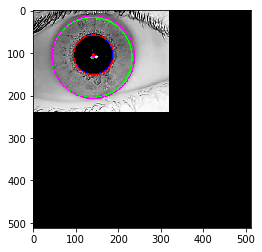

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


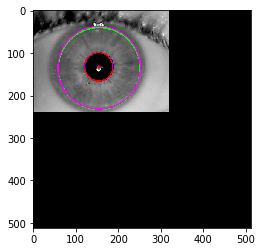

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


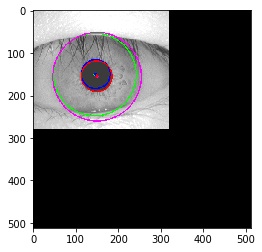

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


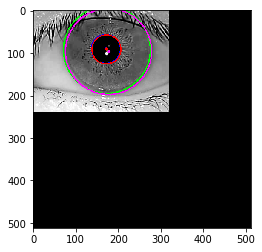

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


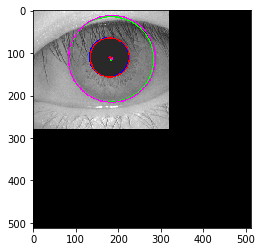

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


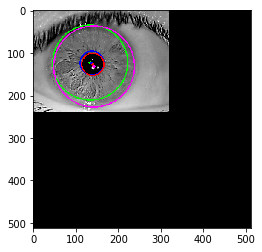

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


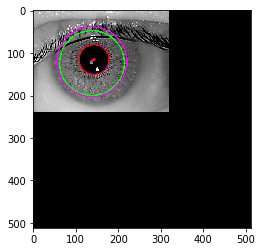

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


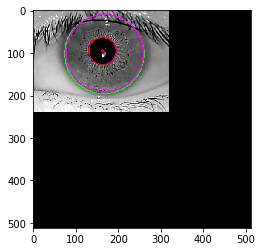

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


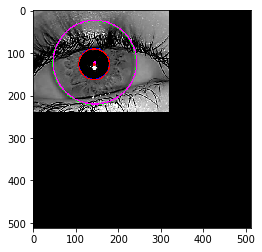

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


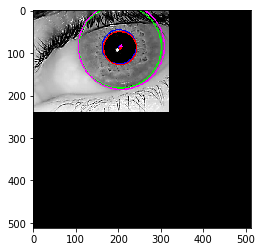

error: /opencv-3.3.1/modules/imgproc/src/drawing.cpp:1902: error: (-215) radius >= 0 && thickness <= MAX_THICKNESS && 0 <= shift && shift <= XY_SHIFT in function circle


In [44]:
haugh_circle_gt(X_train[0:100,:,:,:],Y_train[0:100,:],shortmodel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


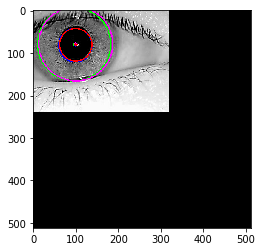

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


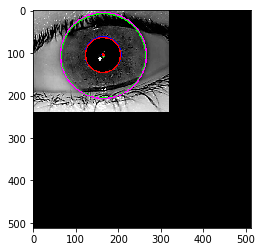

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


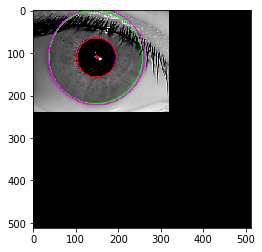

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


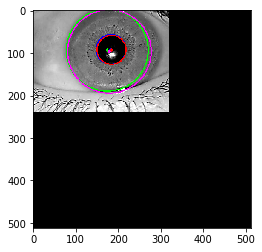

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


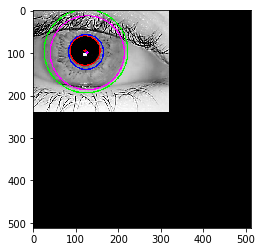

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


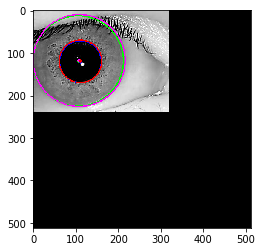

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


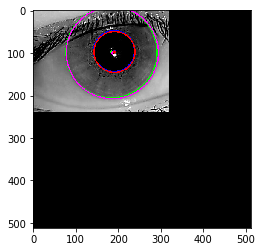

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


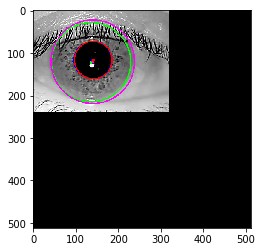

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


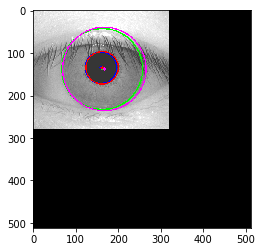

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


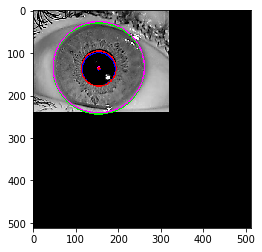

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


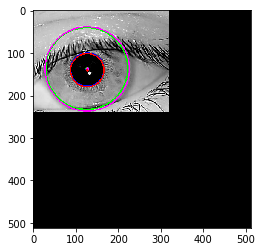

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


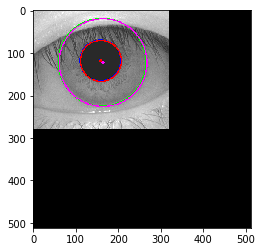

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


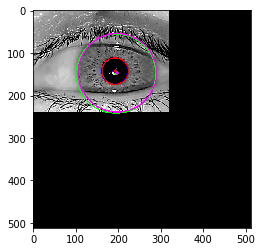

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


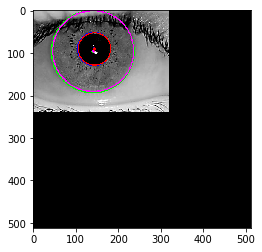

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


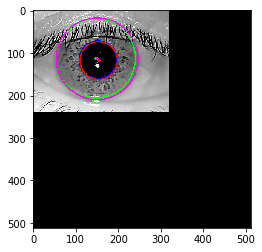

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


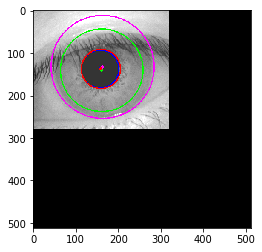

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


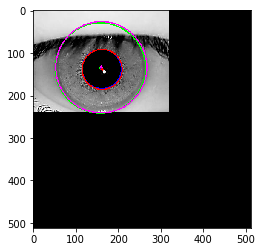

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


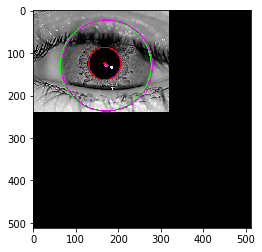

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


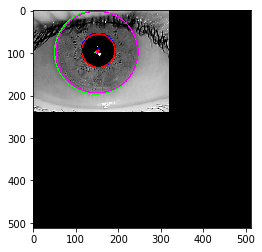

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


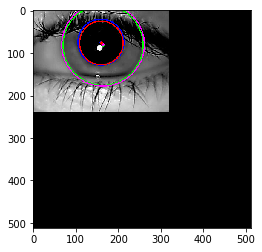

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


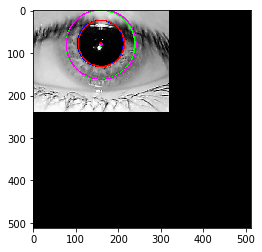

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


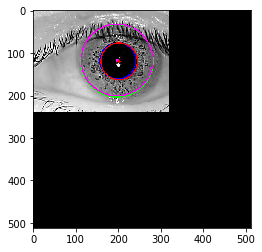

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


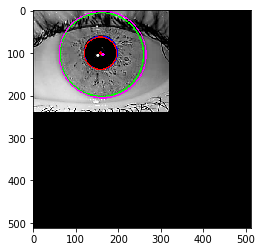

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


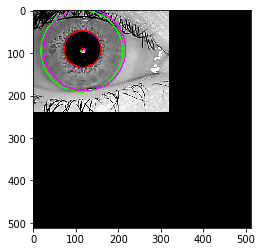

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


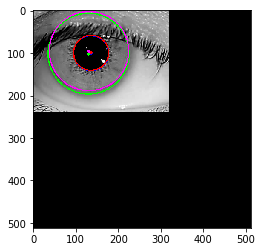

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


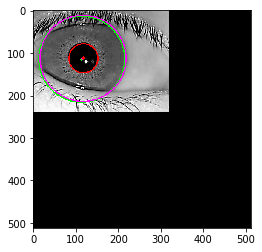

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


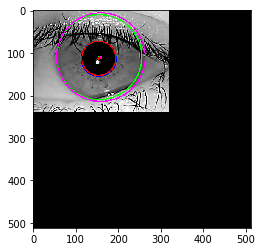

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


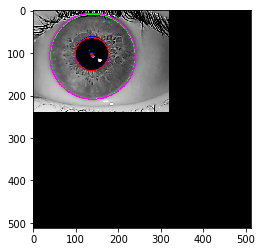

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


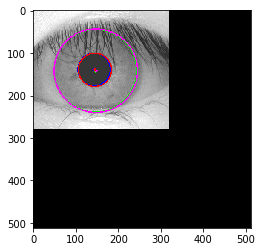

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


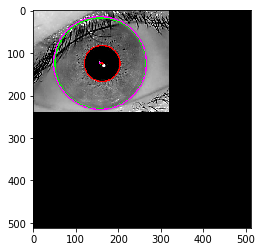

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


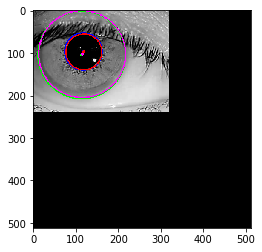

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


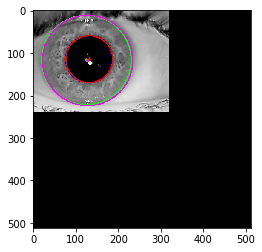

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


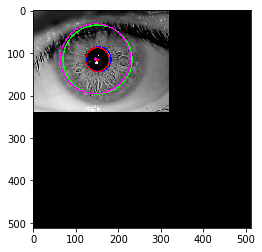

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


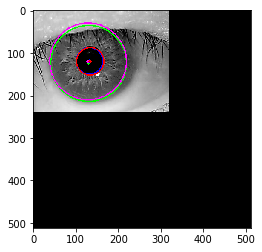

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


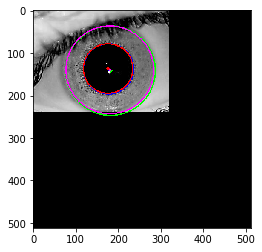

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


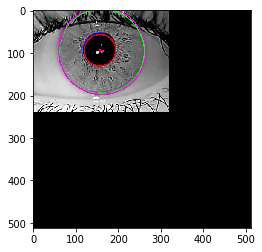

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


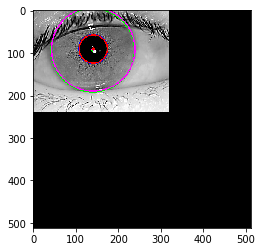

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


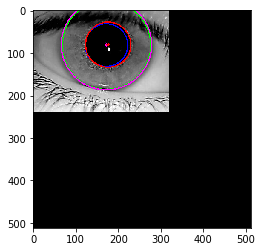

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


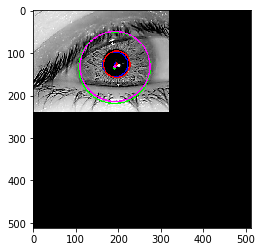

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


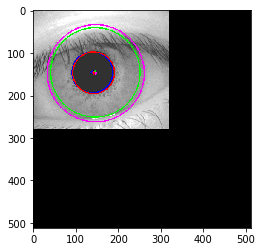

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


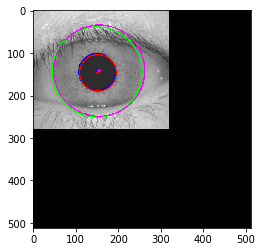

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


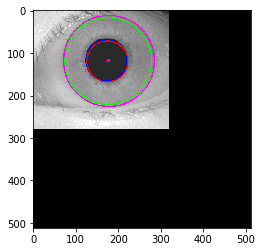

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


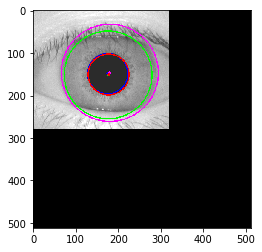

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


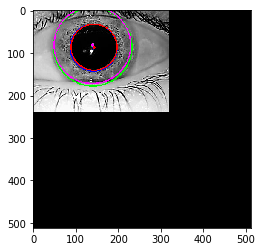

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


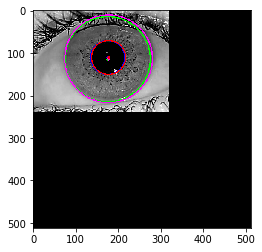

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


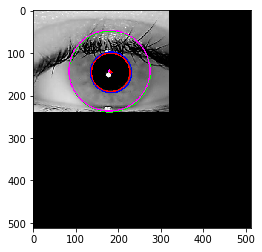

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


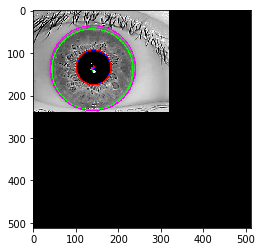

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


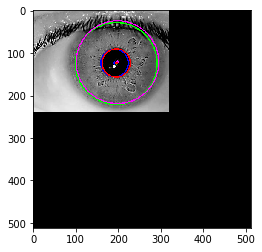

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


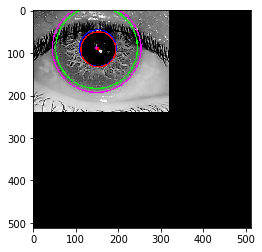

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


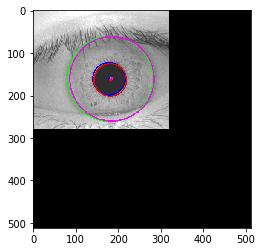

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


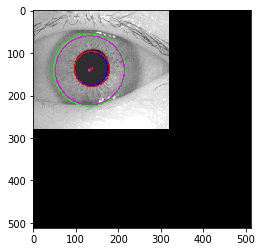

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


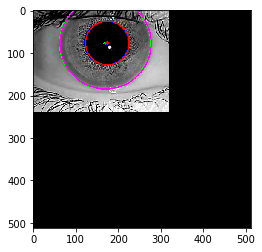

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


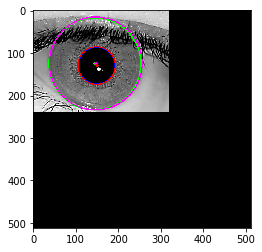

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


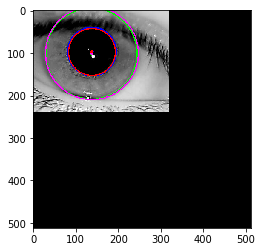

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


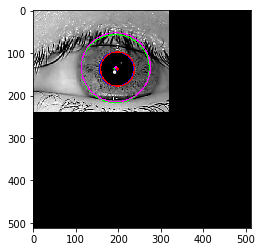

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


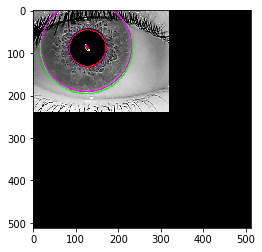

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


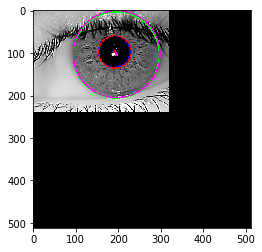

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


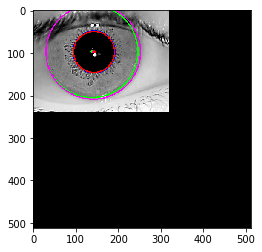

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


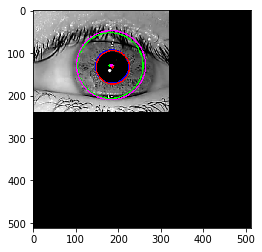

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


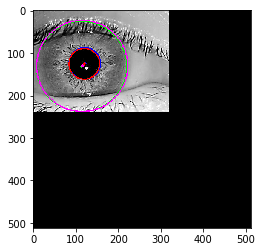

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


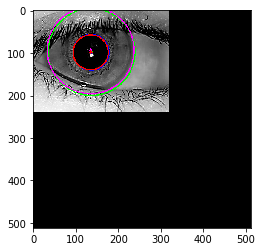

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


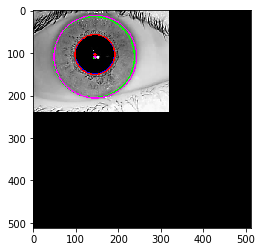

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


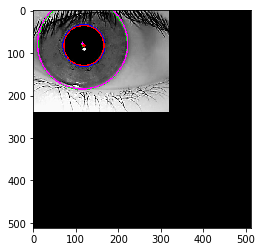

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


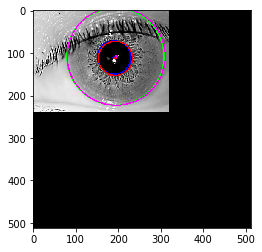

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


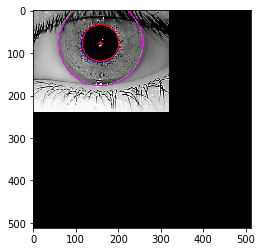

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


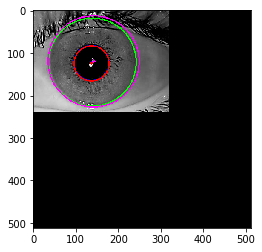

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


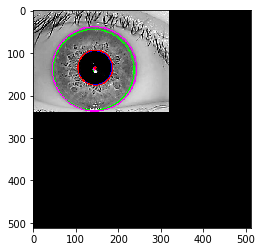

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


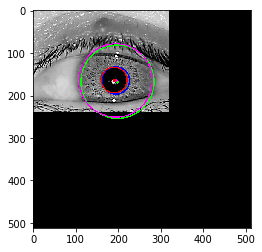

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


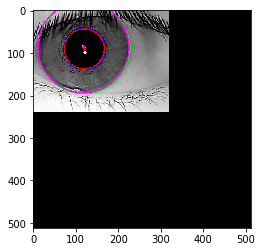

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


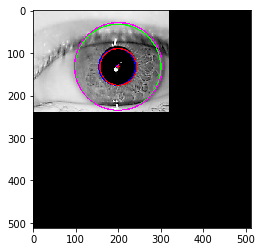

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


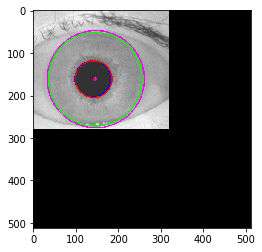

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


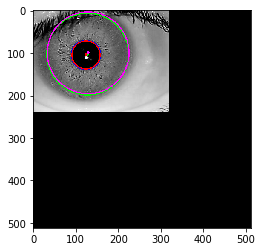

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


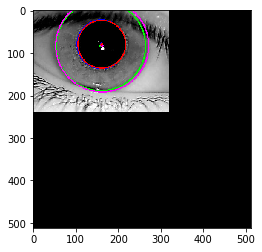

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


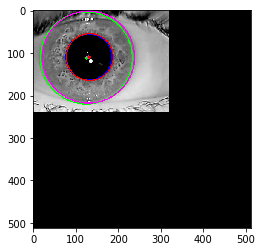

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


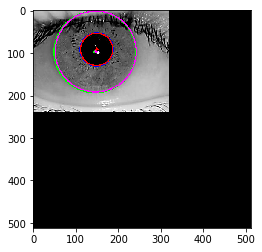

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


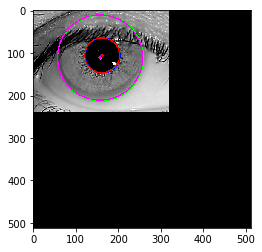

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


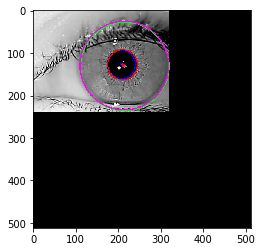

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


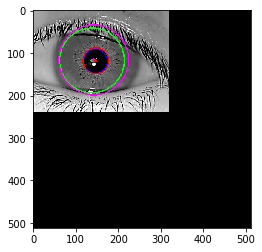

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


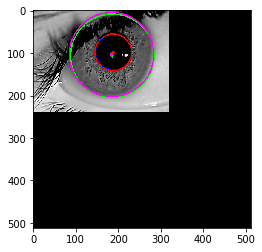

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


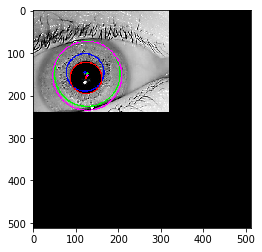

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


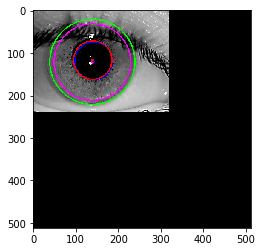

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


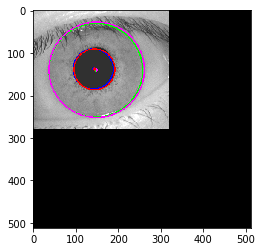

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


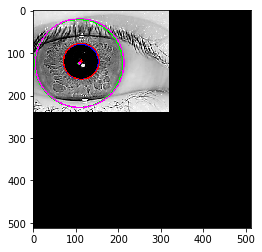

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


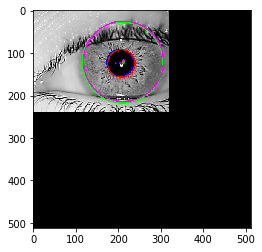

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


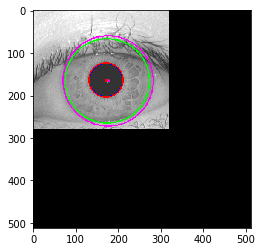

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


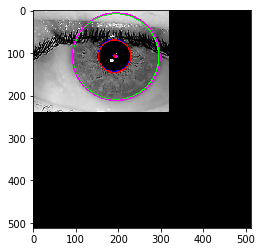

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


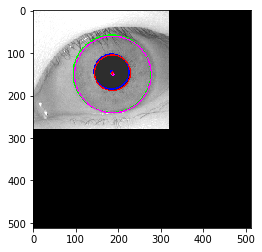

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


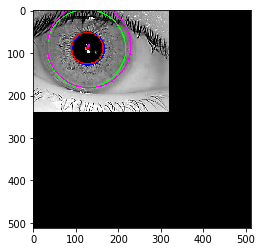

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


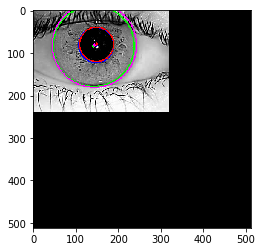

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


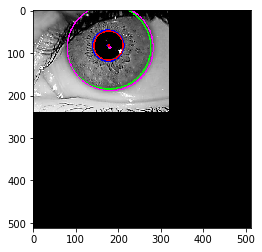

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


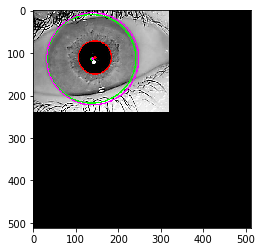

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


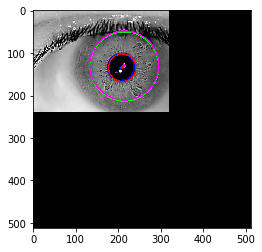

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


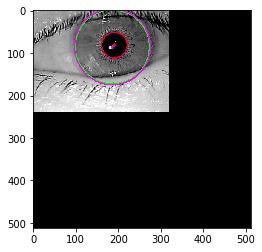

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


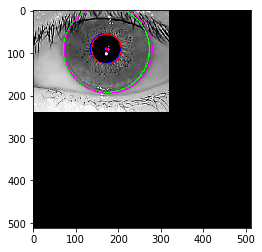

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


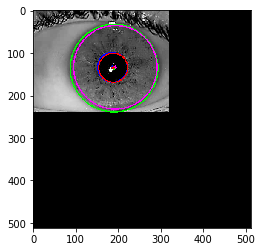

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


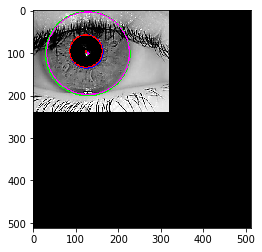

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


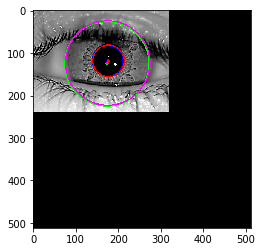

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


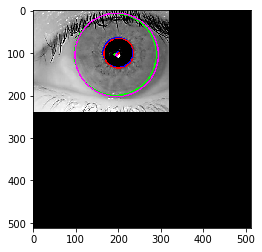

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


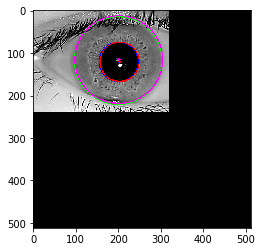

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


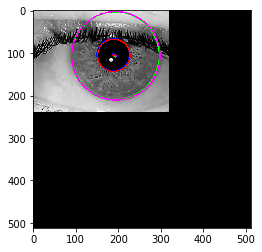

In [45]:
haugh_circle_gt(X_test[0:100,:,:,:],Y_test[0:100,:],shortmodel)

In [ ]:
def save_haugh_circle(X_test,shortmodel,pred_path):        
    preds = shortmodel.predict(X_test) 
    
    for i in range(len(preds)):
        cimg = X_test[i,:,:,:].copy()
        hough_param = preds[i]
        cv2.circle(cimg,(hough_param[0],hough_param[1]),hough_param[2],(0,255,0),2)
                    # draw the center of the circle
        cv2.circle(cimg,(hough_param[0],hough_param[1]),2,(0,255,0),3)

                    #for i in circles_inner[0,:]:
                    # draw the outer circle
        cv2.circle(cimg,(hough_param[3],hough_param[4]),hough_param[5],(0,0,255),2)
                    # draw the center of the circle
        cv2.circle(cimg,(hough_param[3],hough_param[4]),2,(0,0,255),3)

        plt.imshow(cimg)
        plt.show()
        
        #cv2.imwrite(pred_path+str(i)+'.jpg',cimg)

In [ ]:
pred_path = '/tensorflow/Casia_Unet_V1/'
save_haugh_circle(X_train[0:1000,:,:,:],shortmodel,pred_path)

In [ ]:
pred_path = '/tensorflow/Casia_Unet_V1_test/'
save_haugh_circle(X_test,shortmodel,pred_path)

## Module is to test on new dataset 

In [ ]:
def img_pre(img):
    img_in = np.zeros((256,512,3),dtype='float')
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_rgb = cv2.resize(img_rgb,(320,240))
    [h,w,c] = img_rgb.shape

    img_in[0:h,0:w]=img_rgb

    img_out1 = img_in/255.0 
    
    img_out = np.expand_dims(img_out1, axis=0)
    
    return img_out1, img_out



In [ ]:
img_in_path = '/tensorflow/casia_images/046_1_1.bmp'
#img_in_path = '/tensorflow/IITD_Database/123/10.bmp'
img = cv2.imread(img_in_path)
img_out1, img_out = img_pre(img)


In [ ]:
preds1 = shortmodel.predict(img_out)
draw_haugh_circle(img_out1,preds1[0])

In [ ]:
#layer_outputs = [layer.output for layer in unetmodel.layers[:12]] 
#layer_names = [layer.name for layer in unetmodel.layers]
#layer_outputs = [layer.output for layer in unetmodel.layers if
#               layer.name == layer_names or layer_names is None]

layer_outputs = [layer.output for layer in shortmodel.layers[1:]]
activation_model = Model(inputs=shortmodel.input, outputs=layer_outputs)

In [ ]:

# Extracts the outputs of the top 12 layers
#activations = activation_model.predict(X_test[0:1])
activations = activation_model.predict(img_out)
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*4.5,col_size*3.5))    #(row_size*2.5,col_size*1.5)
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
display_activation(activations, 4, 4, 22)


In [ ]:
img_f = np.squeeze(Y_test[10]*255)

In [ ]:
plt.imshow(img_f,cmap='gray')
plt.show()

In [ ]:
def find_start_pos(img):
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] == 255:
                #print(i,j)
                return i, j
    return 0, 0


def get_new_pos(current, direction):
    if direction == 0:
        return current[0] + 0, current[1] - 1
    elif direction == 1:
        return current[0] - 1, current[1] - 1
    elif direction == 2:
        return current[0] - 1, current[1] + 0
    elif direction == 3:
        return current[0] - 1, current[1] + 1
    elif direction == 4:
        return current[0] + 0, current[1] + 1
    elif direction == 5:
        return current[0] + 1, current[1] + 1
    elif direction == 6:
        return current[0] + 1, current[1] + 0
    else:
        return current[0] + 1, current[1] - 1


def get_next_neighbor(current, prev, img):
    neighbors = [
        img[current[0] + 0][current[1] - 1],
        img[current[0] - 1][current[1] - 1],
        img[current[0] - 1][current[1] + 0],
        img[current[0] - 1][current[1] + 1],
        img[current[0] + 0][current[1] + 1],
        img[current[0] + 1][current[1] + 1],
        img[current[0] + 1][current[1] + 0],
        img[current[0] + 1][current[1] - 1]
    ]
    direction = (prev + 1) % 8
    while direction != prev:
        if neighbors[direction] == 255:
            return get_new_pos(current, direction), (direction + 4) % 8
        direction = (direction + 1) % 8
    return None, (direction + 4) % 8

def boundary_and_chain(binary_img):
    """
    :rtype : tuple
    """
    chain = []
    boundary = []
    prev = 0
    current = find_start_pos(binary_img)
    start = current
    boundary.append(current)
    start_counter = 0

    while start_counter < 2:
        if start == current:
            start_counter += 1
        current, prev = get_next_neighbor(current, prev, (binary_img))
        if current is None:
            break
        boundary.append(current)
        #print len(boundary)
        chain.append((prev + 4) % 8)
    return boundary, chain

In [ ]:
boundary_points, chain_code = boundary_and_chain(img_f)

In [ ]:
print(chain_code)

In [ ]:

def minimize_chian_code(chain_code):

    v= np.array(chain_code)
    count = 0
    def f(x):
        global count
        if x: count = 0 
        else: count += 1
        return count
    uf = np.vectorize(f)
    v2 = np.concatenate((v,v))    
    vs = uf(v2)
    i = vs.argmax()
    m = vs[i]
    rot = i-m + 1
    return np.roll(v2,-rot)[:v.size] 

In [ ]:
code = minimize_chian_code(chain_code)*1/7.0

In [ ]:
code.shape

In [ ]:
16*16

In [ ]:
256*256


In [ ]:
img_template = cv2.imread('/home/pvc/deep_learning_own_model/data/segnet_iris_data/val_masks/val/frame_001_06.png',0)


In [ ]:
plt.imshow(img_template,cmap='gray')
plt.show()

In [ ]:
circles_outer = cv2.HoughCircles(img_template,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

In [ ]:
circles_inner = cv2.HoughCircles(img_template,cv2.HOUGH_GRADIENT,1,20,
                            param1=200,param2=20,minRadius=0,maxRadius=50)

In [ ]:
np.concatenate((circles_outer[0][0],circles_inner[0][0]),axis=-1)

In [ ]:
circles_inner

In [ ]:

cimg = cv2.cvtColor(img_template,cv2.COLOR_GRAY2BGR)

In [ ]:
circles_outer = np.uint16(np.around(circles_outer))
for i in circles_outer[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

In [ ]:
plt.axis("off")
plt.title("sobel_image")
plt.imshow(cimg,cmap='gray')